In [1]:
# Importando las bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
# Entendiendo los datos
df = pd.read_csv("preu lloguer per trimestre i barri.csv")
df.head()
df.info()
df[df["Lloguer_mitja"] == "Lloguer mitjà mensual (Euros/mes)"]
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce') # converting price from object to numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [ ]:
# Una variable categorical (Barrio)

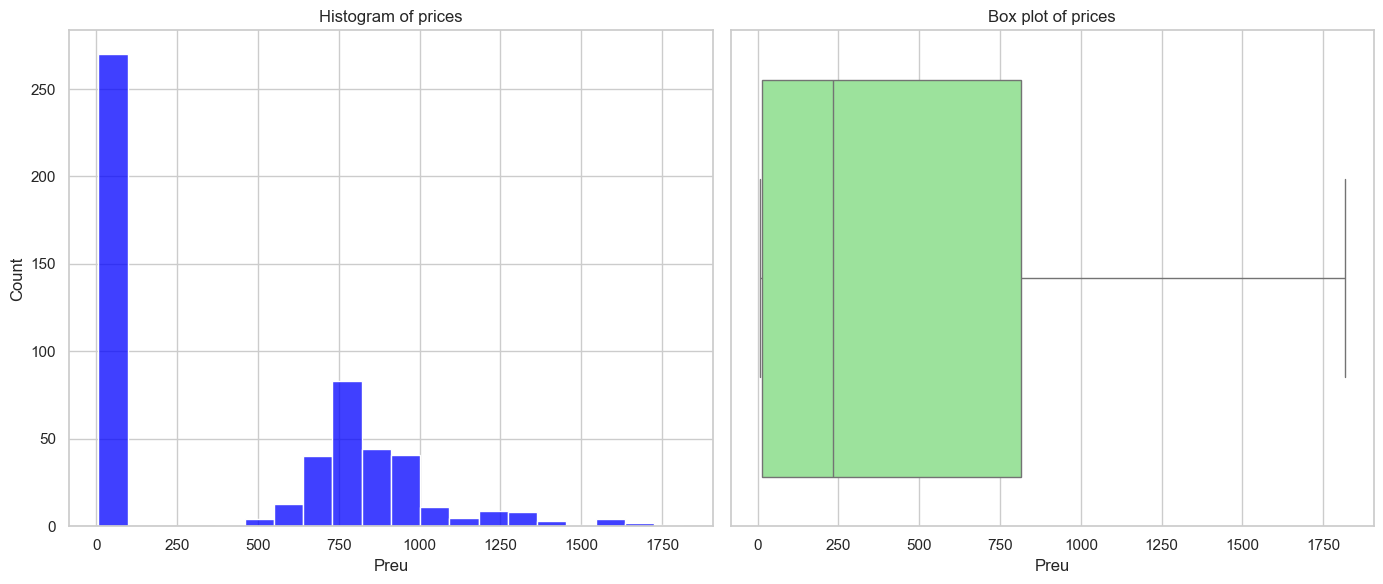

In [66]:
# Una variable numérica (Preu)
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Preu'], bins = 20, kde=False, color='blue')
plt.title('Histogram of prices')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Preu'], color='lightgreen')
plt.title('Box plot of prices')

plt.tight_layout()
plt.show()

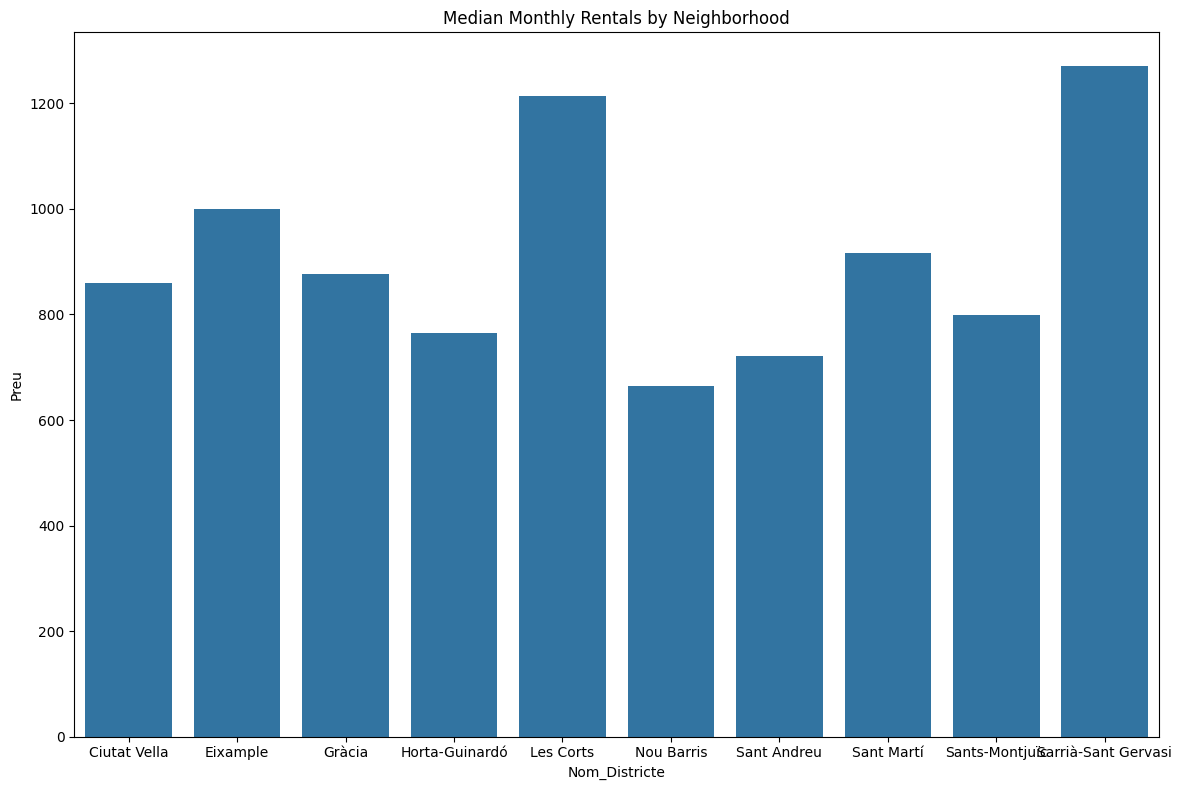

In [55]:
# Crea una visualización para una variable numérica y categórica (Distrito y Precio)
# Solo cogemos las líneas de alquiler mensuales
df_montlhy_rental = df[df["Lloguer_mitja"] == "Lloguer mitjà mensual (Euros/mes)"]
mean_rental_per_neighborhood = df_montlhy_rental.groupby('Nom_Districte')['Preu'].mean()
mean_rental_per_neighborhood = mean_rental_per_neighborhood.reset_index() # convert series to dataframe to seaborn

plt.figure(figsize=(12, 8))
sns.barplot(x='Nom_Districte', y='Preu', data=mean_rental_per_neighborhood)
plt.title('Median Monthly Rentals by Neighborhood')
plt.tight_layout()
plt.show()